In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [ ]:
#loading data
f = "survey.csv"
df = pd.read_csv(f)
print(df)

                Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  .

In [ ]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
# Handle missing values
# Drop the 'comments' column as it might not be useful for analysis
df = df.drop(columns=['comments'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
# Handle missing values in the 'Age' column
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])
print(df)

                Timestamp   Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31  37.0  Female   United States    IL           NaN   
1     2014-08-27 11:29:37  44.0       M   United States    IN           NaN   
2     2014-08-27 11:29:44  32.0    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46  31.0    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22  31.0    Male   United States    TX           NaN   
...                   ...   ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21  26.0    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35  32.0    Male   United States    IL            No   
1256  2015-11-07 12:36:58  34.0    male   United States    CA            No   
1257  2015-11-30 21:25:06  46.0       f   United States    NC            No   
1258  2016-02-01 23:04:31  25.0    Male   United States    IL            No   

     family_history treatment work_interfere    no_

In [ ]:
# Encode binary columns
binary_cols = ['self_employed', 'family_history', 'treatment', 'remote_work', 'tech_company', 'benefits',
               'wellness_program', 'seek_help', 'anonymity', 'mental_health_interview', 'phys_health_interview',
               'mental_vs_physical', 'obs_consequence']

for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


In [ ]:
# Display the first 10 rows of the preprocessed dataset
df.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37.0,Female,United States,IL,2,0,1,Often,6-25,...,2,Somewhat easy,No,No,Some of them,Yes,1,0,2,0
1,2014-08-27 11:29:37,44.0,M,United States,IN,2,0,0,Rarely,More than 1000,...,0,Don't know,Maybe,No,No,No,1,1,0,0
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,2,0,0,Rarely,6-25,...,0,Somewhat difficult,No,No,Yes,Yes,2,2,1,0
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,NaN,2,1,1,Often,26-100,...,1,Somewhat difficult,Yes,Yes,Some of them,No,0,0,1,1
4,2014-08-27 11:30:22,31.0,Male,United States,TX,2,0,0,Never,100-500,...,0,Don't know,No,No,Some of them,Yes,2,2,0,0
5,2014-08-27 11:31:22,33.0,Male,United States,TN,2,1,0,Sometimes,6-25,...,0,Don't know,No,No,Yes,Yes,1,0,0,0
6,2014-08-27 11:31:50,35.0,Female,United States,MI,2,1,1,Sometimes,1-5,...,1,Somewhat difficult,Maybe,Maybe,Some of them,No,1,1,0,0
7,2014-08-27 11:32:05,39.0,M,Canada,NaN,2,0,0,Never,1-5,...,2,Don't know,No,No,No,No,1,1,1,0
8,2014-08-27 11:32:39,42.0,Female,United States,IL,2,1,1,Sometimes,100-500,...,1,Very difficult,Maybe,No,Yes,Yes,1,0,1,0
9,2014-08-27 11:32:43,23.0,Male,Canada,NaN,2,0,0,Never,26-100,...,0,Don't know,No,No,Yes,Yes,0,0,2,0


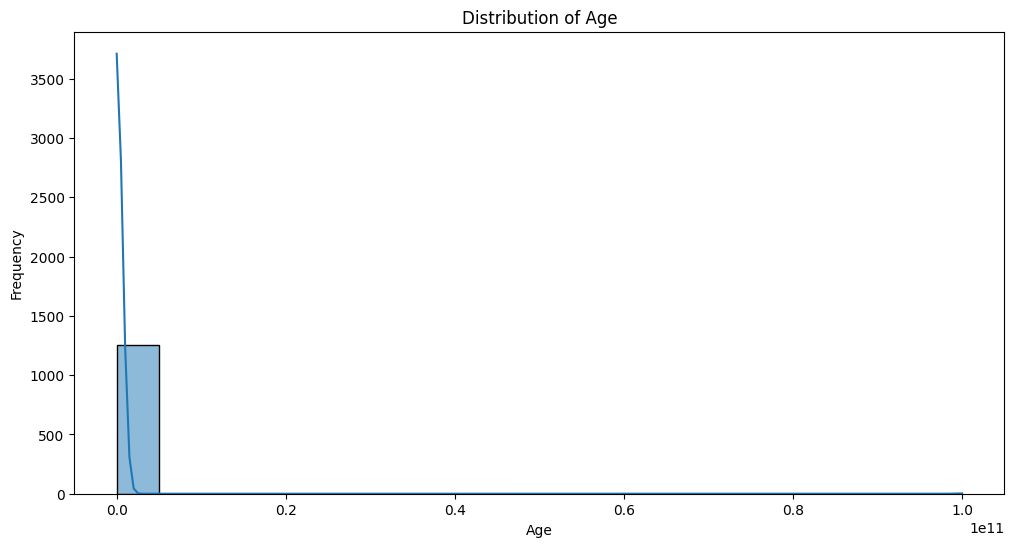

In [ ]:
# Data Visualization
# Distribution of Age
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


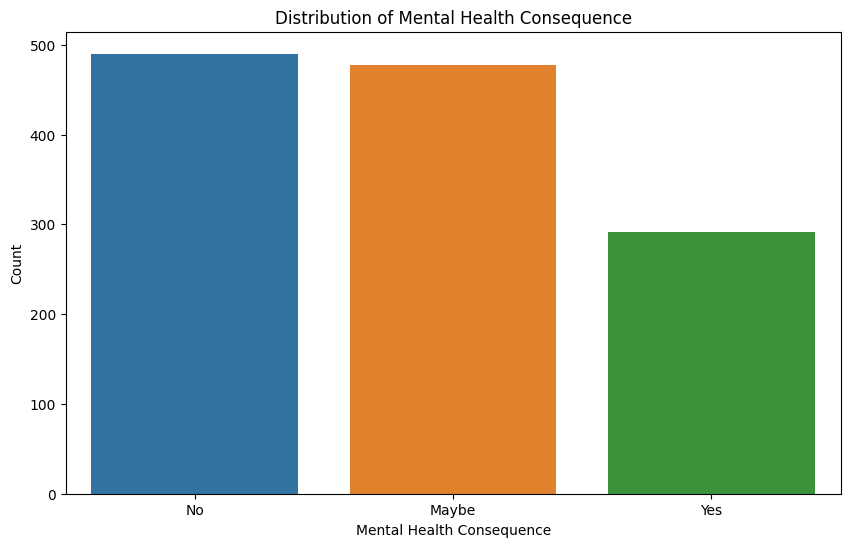

In [ ]:
# Distribution of Mental Health Consequences
plt.figure(figsize=(10, 6))
sns.countplot(x='mental_health_consequence', data=df)
plt.title('Distribution of Mental Health Consequence')
plt.xlabel('Mental Health Consequence')
plt.ylabel('Count')
plt.show()

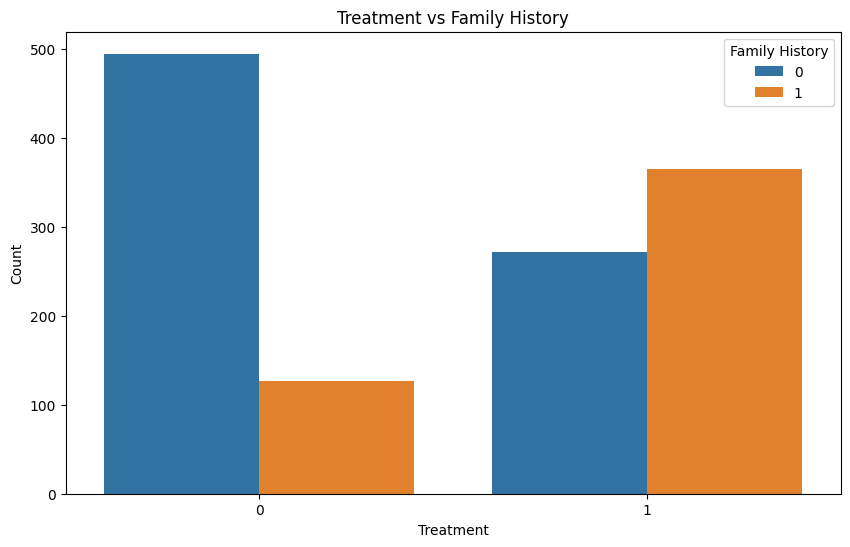

In [ ]:
# Relationship between seeking treatment and family history
plt.figure(figsize=(10, 6))
sns.countplot(x='treatment', hue='family_history', data=df)
plt.title('Treatment vs Family History')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.legend(title='Family History', loc='upper right')
plt.show()

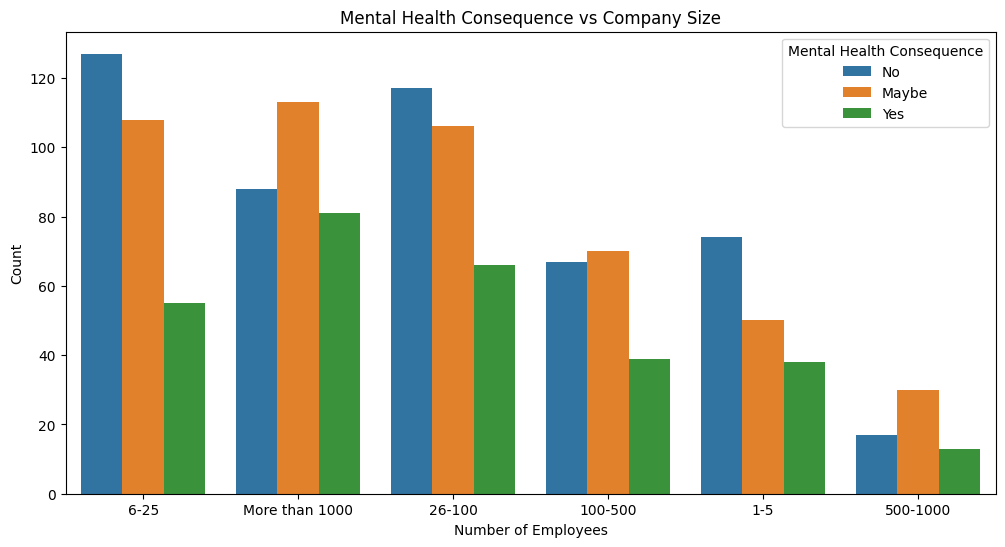

In [ ]:
# Distribution of Mental Health Consequence based on company size
plt.figure(figsize=(12, 6))
sns.countplot(x='no_employees', hue='mental_health_consequence', data=df)
plt.title('Mental Health Consequence vs Company Size')
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.legend(title='Mental Health Consequence', loc='upper right')
plt.show()

<ipython-input-33-b09edebd3fa9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


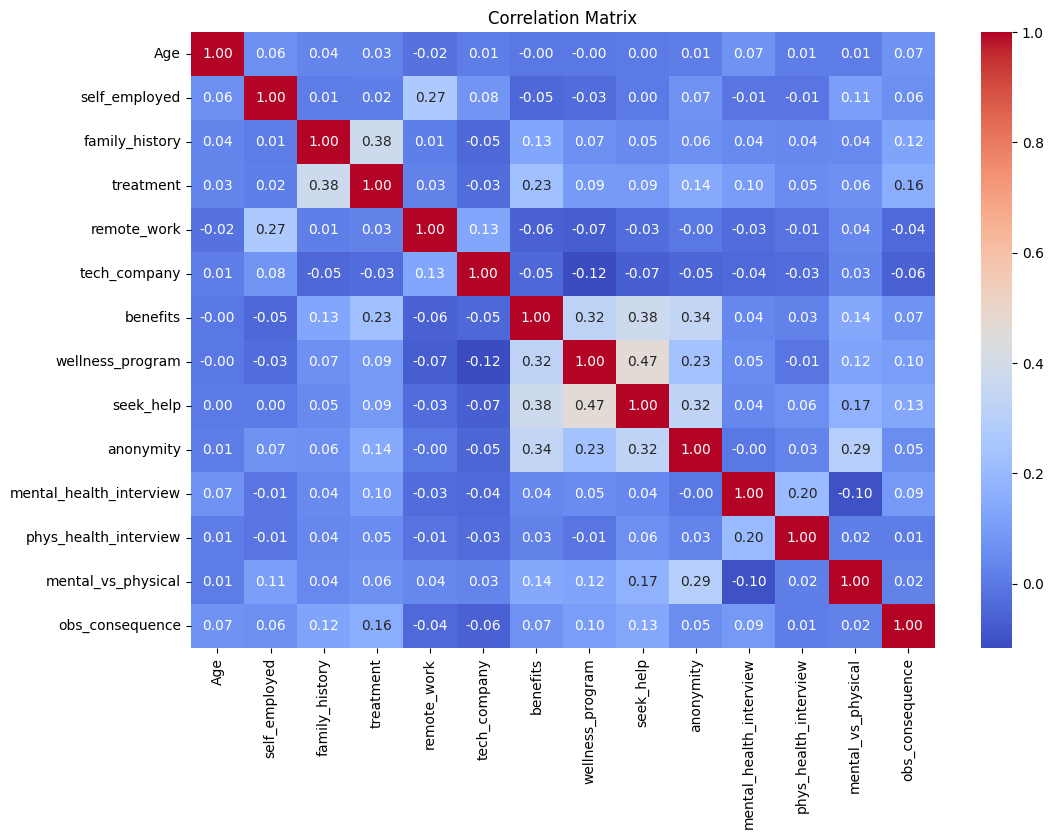

In [ ]:
# Correlation matrix to understand relationships between numerical variables
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Drop unnecessary columns
df = df.drop(['Timestamp'], axis=1)  #timestamp is non-numerical

# Split the data into features (X) and target variable (y)
X = df.drop(['treatment'], axis=1)
y = df['treatment']

# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.54


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.12      0.21       129
           1       0.51      0.97      0.67       123

    accuracy                           0.54       252
   macro avg       0.66      0.55      0.44       252
weighted avg       0.66      0.54      0.44       252




Confusion Matrix:


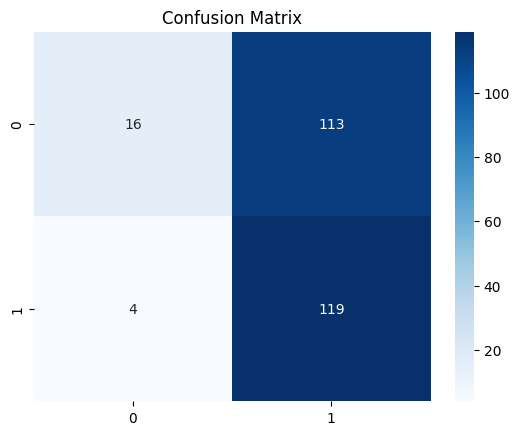

In [ ]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()